In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append('../')
from analytics_labels import *
from analytics_functions import clean_activations


ACTS = [ACT0, ACT1, ACT2, ACT3, ACT4]


In [14]:
def get_thr(act):
    return {ACT0: THR_ACT0, ACT1: THR_ACT1, ACT2: THR_ACT2, ACT3: THR_ACT3, ACT4: THR_ACT4}[act]

def make_df(data):
    df = pd.DataFrame()

    for d in data:
        df_temp = pd.read_csv(d['file'])

        df_temp = df_temp[df_temp[DIST] < 20]
        df_temp[DIST] = df_temp[DIST].apply(lambda x: - x)
        df_temp[LABEL] = d['label']

        for a in ACTS:
            df_temp[a] = df_temp[a].apply(clean_activations)
            df_temp[a] = df_temp[a].apply(np.median)

        df = df.append(df_temp)
    return df


def show(data, pprint=True, thr=False):
    labels = {ACT0: 'Left', ACT1: 'Centre-Left', ACT2: 'Centre', ACT3: 'Centre-Right', ACT4: 'Right'}

    fig, axs = plt.subplots(1, 5, figsize=(25,5))

    for i, act in enumerate(ACTS):                
        axs[i].plot(data[DIST], data[act], label = 'Raw')
        axs[i].set_title(labels[act])

        if thr:
            thr_act = data[get_thr(act)]
            axs[i].plot(data[DIST], thr_act, label='Threshold: '  + str(thr[i]))
            axs[i].legend()
        axs[i].set_xlabel('Distance')
        axs[i].set_ylabel('Activation')

    fig.suptitle('Activations for: ' + data[LABEL].iloc[0])
    plt.show()

    if pprint:
        for a in ACTS:
            print('\n  - ' + a + ':\n')
            print('    - Mean: ' + str(round(np.mean(data[a]), 2)))
            print('    - Median: ' + str(round(np.median(data[a]), 2)))
            print('    - Std: ' + str(round(np.std(data[a]), 2)))
        print('\n')

In [15]:
def add_threshold(df, act, t):
    thr = {ACT0: THR_ACT0, ACT1: THR_ACT1, ACT2: THR_ACT2}[act]
    df[thr] = df[act]
    df[thr] = df[thr].apply(lambda x: x if x >= t else np.nan)
    return df
    

## Central obstacle

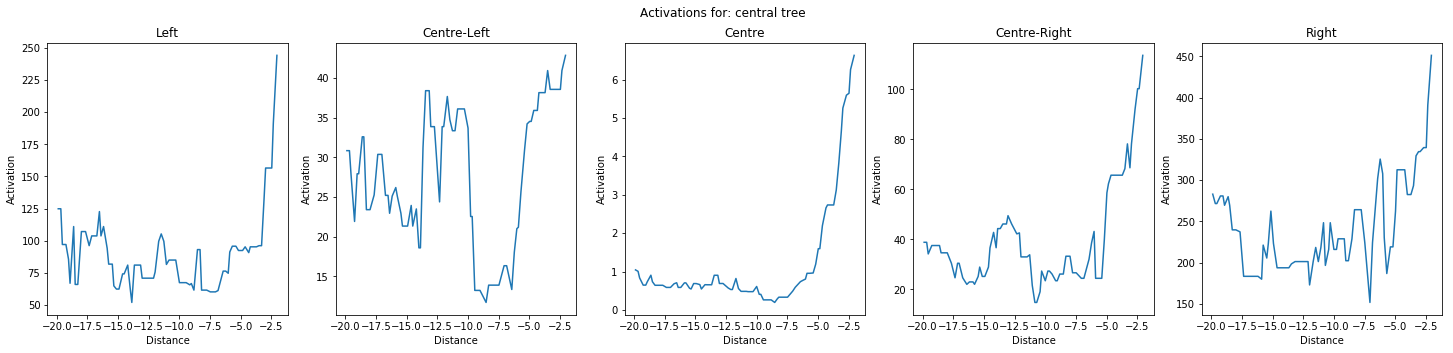


  - activation_0:

    - Mean: 90.46
    - Median: 84.89
    - Std: 30.11

  - activation_1:

    - Mean: 27.72
    - Median: 27.94
    - Std: 8.61

  - activation_2:

    - Mean: 1.2
    - Median: 0.66
    - Std: 1.44

  - activation_3:

    - Mean: 39.52
    - Median: 33.26
    - Std: 20.22

  - activation_4:

    - Mean: 242.66
    - Median: 226.47
    - Std: 54.96




In [16]:
data = [
    {
        'file': 'csv/0-central-obstacle-0.csv',
        'label': 'central tree'
    }
]

df = make_df(data)
# df = add_threshold(df, ACT0, thrs[0])
# df = add_threshold(df, ACT1, thrs[1])
# df = add_threshold(df, ACT2, thrs[2])

show(df, thr=False)

## Right obstacle only

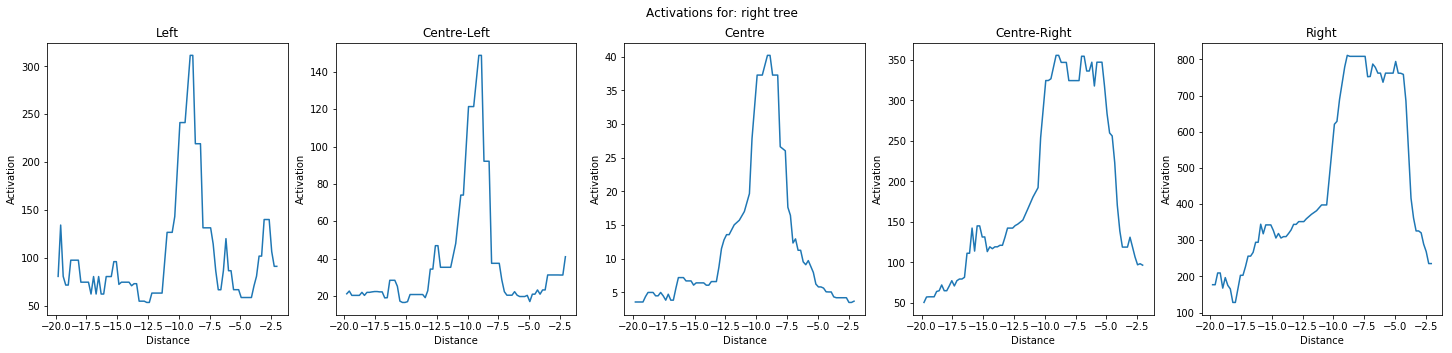


  - activation_0:

    - Mean: 99.54
    - Median: 80.44
    - Std: 55.09

  - activation_1:

    - Mean: 35.06
    - Median: 22.34
    - Std: 29.43

  - activation_2:

    - Mean: 10.83
    - Median: 6.41
    - Std: 10.01

  - activation_3:

    - Mean: 180.11
    - Median: 138.74
    - Std: 105.26

  - activation_4:

    - Mean: 446.54
    - Median: 343.87
    - Std: 231.02




In [19]:
data = [
    {
        'file': 'csv/0-right-obstacle-0.csv',
        'label': 'right tree'
    }
]

df = make_df(data)
# df = add_threshold(df, ACT0, thrs[0])
# df = add_threshold(df, ACT1, thrs[1])
# df = add_threshold(df, ACT2, thrs[2])

show(df, thr=False)

## Right and central obstacle

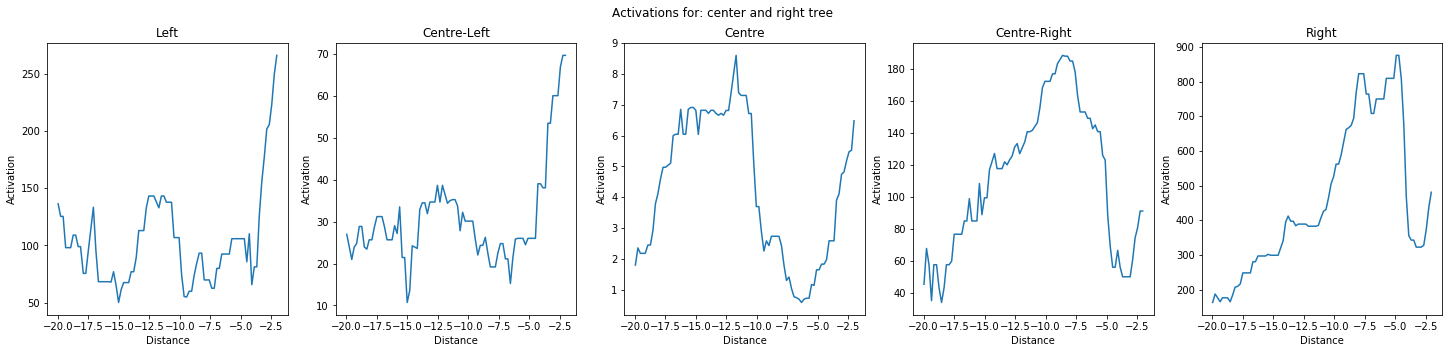


  - activation_0:

    - Mean: 104.08
    - Median: 95.55
    - Std: 41.9

  - activation_1:

    - Mean: 30.8
    - Median: 26.98
    - Std: 11.65

  - activation_2:

    - Mean: 4.18
    - Median: 4.09
    - Std: 2.3

  - activation_3:

    - Mean: 111.77
    - Median: 117.71
    - Std: 45.84

  - activation_4:

    - Mean: 460.53
    - Median: 388.89
    - Std: 215.56




In [22]:
data = [
    {
        'file': 'csv/0-right-central-obstacle-0.csv',
        'label': 'center and right tree'
    }
]

df = make_df(data)
# df = add_threshold(df, ACT0, thrs[0])
# df = add_threshold(df, ACT1, thrs[1])
# df = add_threshold(df, ACT2, thrs[2])

show(df, thr=False)